Code-along YouTube session: https://www.youtube.com/watch?v=ujId4ipkBio

**Description:** 

This is a sentiment analysis program that parses the tweets fetched from Twitter using Python. 

Account: Gucci

In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Twitter API credentials

consumerKey = 'vpBT5zCco120S5VkWGeq0jbU3'
consumerSecret = 'nIk59NQikAS9kug5GcOkWuEqOqbAr1UgRhn5H77T9OiCdeEo7m'
accessToken = '1362326919157583873-3NVcDUiiEBUsZGe06A7HzCTAs1tEDb'
accessTokenSecret = 'Y0Wrzi23jYd0TiAe9tNqQHax3PFqBrPRg2N2KQCl0rVtJ'


In [3]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [4]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name = "Gucci", count= 500, lang = 'en', tweet_mode='extended')

# Print the last 5 tweets from the account
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ') '+ tweet.full_text + '\n')
  i = i + 1

Show the 5 recent tweets: 

1) On the second night of #Harryween, @harrystyles and his band dressed up as clowns in custom #Gucci looks by #AlessandroMichele. #HarryStyles
Photographed by #AnthonyPham and styled by @harry_lambert. https://t.co/K1nAVOQPkG

2) #JayZ was inducted into the Rock &amp; Roll Hall of Fame wearing a #Gucci dark blue satin tuxedo with evening shirt and silk bow tie designed by #AlessandroMichele. Styled by @juneAmbrose. @rockhall #RockHall2021 #GucciTailoring https://t.co/tMsOHjyK5a

3) For his #Harryween concert, @harrystyles and members of his band dressed up as characters from the book ‘The Wonderful Wizard of Oz’ in custom #Gucci looks by #AlessandroMichele
Photographed by #AnthonyPham and styled by @harry__lambert. https://t.co/cdU2ipZHcN

4) A brush with divinity
Stay tuned for #GucciLoveParade #AlessandroMichele https://t.co/lV7coGBdfO

5) Coming soon to a Boulevard near you on November 2 at 8pm. #GucciLoveParade #AlessandroMichele
© Universal City Studio

In [5]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns=['Tweets'])

# Show the first 5 rows of data
df.head()

,Tweets
0,"On the second night of #Harryween, @harrystyle..."
1,#JayZ was inducted into the Rock &amp; Roll Ha...
2,"For his #Harryween concert, @harrystyles and m..."
3,A brush with divinity\nStay tuned for #GucciLo...
4,Coming soon to a Boulevard near you on Novembe...


In [6]:
# Clean the text

# Create a function to clean the tweets

def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text) #Revoming @mentions
  text = re.sub(r'#', '', text) # Removing the '#' simbol
  text = re.sub(r'RT[\s]+', '', text) # Removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) # Removing the hyper link

  return text

# Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned text
df

,Tweets
0,"On the second night of Harryween, and his ban..."
1,JayZ was inducted into the Rock &amp; Roll Hal...
2,"For his Harryween concert, and members of his..."
3,A brush with divinity\nStay tuned for GucciLov...
4,Coming soon to a Boulevard near you on Novembe...
...,...
195,"Known for its half-moon shape, the GucciJackie..."
196,"On the new GucciPodcast, writer and curator t..."
197,Pick your favorite GucciBeauty shade. From mat...
198,: The new virtual Gucci items✨ are now availab...


In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,A brush with divinity\nStay tuned for GucciLov...,0.000000,0.000000
1,Coming soon to a Boulevard near you on Novembe...,0.200000,0.050000
2,"Hollywood, here we come. MarilynMonroe GucciLo...",0.400000,0.000000
3,covers the latest issue of Elle Korea in look...,0.900000,0.500000
4,Spotted in a scene from the second official tr...,0.000000,0.000000
...,...,...,...
95,Performing at the GlobalCitizenLive concert in...,0.454545,0.136364
96,"At the GlobalCitizenLive concert in Paris, —wh...",0.900000,0.500000
97,In the first episode of a new GucciPodcast min...,0.410606,0.155682
98,Vault is many different things at once: a time...,0.613636,0.234091


<function matplotlib.pyplot.show>

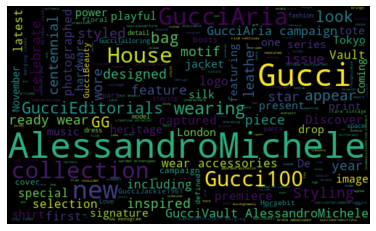

In [ ]:
# Plot the Word Cloud
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show

In [ ]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,A brush with divinity\nStay tuned for GucciLov...,0.000000,0.000000,Neutral
1,Coming soon to a Boulevard near you on Novembe...,0.200000,0.050000,Positive
2,"Hollywood, here we come. MarilynMonroe GucciLo...",0.400000,0.000000,Neutral
3,covers the latest issue of Elle Korea in look...,0.900000,0.500000,Positive
4,Spotted in a scene from the second official tr...,0.000000,0.000000,Neutral
...,...,...,...,...
95,Performing at the GlobalCitizenLive concert in...,0.454545,0.136364,Positive
96,"At the GlobalCitizenLive concert in Paris, —wh...",0.900000,0.500000,Positive
97,In the first episode of a new GucciPodcast min...,0.410606,0.155682,Positive
98,Vault is many different things at once: a time...,0.613636,0.234091,Positive


In [ ]:
# Print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j+1

1) Coming soon to a Boulevard near you on November 2 at 8pm. GucciLoveParade AlessandroMichele
© Universal City Studios LLC. All Rights Reserved 

2)  covers the latest issue of Elle Korea in looks from GucciAria including pieces from TheHackerProject, a merging of codes between  and Gucci. Photographed by Yeongjun Kim and styled by Joohee Noh. AlessandroMichele 

3) FloraFantasty campaign star  appears in a series of playful images featured in ’s Fall 2021 issue and in a special zine created in collaboration with Gucci and GucciBeauty to celebrate the Gucci Flora Gorgeous Gardenia fragrance. AlessandroMichele 

4) Based on a design originally created in ‘60s, the GucciJackie1961 is recognizable for its half-moon shape and piston hardware. 
Discover the handbag collection part of GucciBeloved  AlessandroMichele 

5) A playful video reveals the making of the signature GucciJackie1961, whose design represents an historical style brought back to the forefront by Creative Director Alessand

In [ ]:
# Print the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j+1

1) VogueGreece’s November issue features  in a series of GucciAria looks including a fake fur jacket, a 70s inspired suit and a GG sequin coat. JaredLeto is photographed by  and styled by MichaelPhilouze. GucciEditorials AlessandroMichele 

2) Looks from the GucciAria collection include floral lace tops and fake leather skirts paired with silk scarves featuring the GG motif combined with a Horsebit print.  

3) Gucci100 brings together fashion and music in a collection that nods to the past while staying firmly in the present.  

4) Gucci100 brings together fashion and music in a collection that nods to the past while staying firmly in the present. GucciJackie1961  



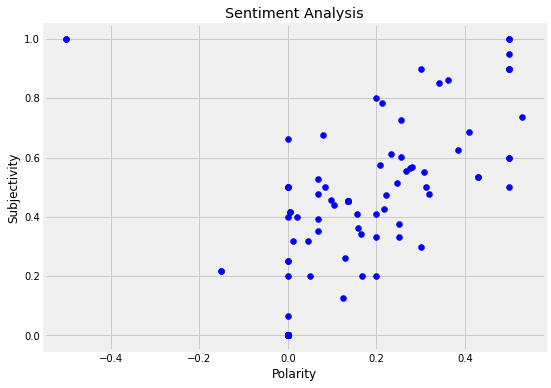

In [ ]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0])*100, 1)

65.0

In [ ]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round( (ntweets.shape[0] / df.shape[0])*100, 1)

4.0

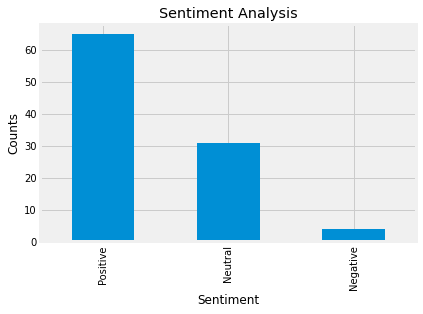

In [ ]:
# Show the value counts
df['Analysis'].value_counts()

# Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

We can see an impact proportion of neutral Tweets which raise the question of the role of tweets in Luxury Sales. Indeed, one of the characteric of Luxury Marketing is that Luxury Brands don't market their products but are just focus on the storytelling of the product. For the next session let's see how we can try to spot storytelling tweets.